In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving archive (14).zip to archive (14).zip


In [3]:
import zipfile
with zipfile.ZipFile("archive (14).zip", 'r') as zip_ref:
    zip_ref.extractall("butterfly_data")

In [4]:
import os
os.listdir("butterfly_data")


['test', 'train', 'Testing_set.csv', 'Training_set.csv']

In [5]:
train_df = pd.read_csv("butterfly_data/Training_set.csv")
test_df  = pd.read_csv("butterfly_data/Testing_set.csv")

In [6]:
train_df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [7]:
train_df['image_path'] = train_df['filename'].apply(lambda x: f"butterfly_data/train/{x}")
test_df['image_path']  = test_df['filename'].apply(lambda x: f"butterfly_data/test/{x}")


In [8]:
missing_train = [p for p in train_df['image_path'] if not os.path.exists(p)]
missing_test  = [p for p in test_df['image_path'] if not os.path.exists(p)]
print("Missing training images:", len(missing_train))
print("Missing testing images:", len(missing_test))

Missing training images: 0
Missing testing images: 0


In [9]:
train_df['label'].value_counts()

,count
label,
MOURNING CLOAK,131
SLEEPY ORANGE,107
ATALA,100
BROWN SIPROETA,99
SCARCE SWALLOW,97
...,...
AMERICAN SNOOT,74
GOLD BANDED,73
MALACHITE,73


Data Preparation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Create Generators

Tell Keras where images are and how to read them in batches.

In [11]:
train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 5200 validated image filenames belonging to 75 classes.


In [12]:
val_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1299 validated image filenames belonging to 75 classes.


Build the Model

Uses a pre-trained base model (MobileNetV2) for feature extraction.

Adds new layers for your butterfly classification task.

Output layer has 75 neurons = 75 classes.

In [13]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(len(train_gen.class_indices), activation='softmax')  # 75 classes
])


In [16]:
print(train_gen.class_indices)
print("Number of classes:", len(train_gen.class_indices))

{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ATALA': 5, 'BANDED ORANGE HELICONIAN': 6, 'BANDED PEACOCK': 7, 'BECKERS WHITE': 8, 'BLACK HAIRSTREAK': 9, 'BLUE MORPHO': 10, 'BLUE SPOTTED CROW': 11, 'BROWN SIPROETA': 12, 'CABBAGE WHITE': 13, 'CAIRNS BIRDWING': 14, 'CHECQUERED SKIPPER': 15, 'CHESTNUT': 16, 'CLEOPATRA': 17, 'CLODIUS PARNASSIAN': 18, 'CLOUDED SULPHUR': 19, 'COMMON BANDED AWL': 20, 'COMMON WOOD-NYMPH': 21, 'COPPER TAIL': 22, 'CRECENT': 23, 'CRIMSON PATCH': 24, 'DANAID EGGFLY': 25, 'EASTERN COMA': 26, 'EASTERN DAPPLE WHITE': 27, 'EASTERN PINE ELFIN': 28, 'ELBOWED PIERROT': 29, 'GOLD BANDED': 30, 'GREAT EGGFLY': 31, 'GREAT JAY': 32, 'GREEN CELLED CATTLEHEART': 33, 'GREY HAIRSTREAK': 34, 'INDRA SWALLOW': 35, 'IPHICLUS SISTER': 36, 'JULIA': 37, 'LARGE MARBLE': 38, 'MALACHITE': 39, 'MANGROVE SKIPPER': 40, 'MESTRA': 41, 'METALMARK': 42, 'MILBERTS TORTOISESHELL': 43, 'MONARCH': 44, 'MOURNING CLOAK': 45, 'ORANGE OAKLEAF': 46, 'ORANGE TI

In [17]:
val_gen.class_indices
train_gen.class_indices     #to convert the class into number


{'ADONIS': 0,
 'AFRICAN GIANT SWALLOWTAIL': 1,
 'AMERICAN SNOOT': 2,
 'AN 88': 3,
 'APPOLLO': 4,
 'ATALA': 5,
 'BANDED ORANGE HELICONIAN': 6,
 'BANDED PEACOCK': 7,
 'BECKERS WHITE': 8,
 'BLACK HAIRSTREAK': 9,
 'BLUE MORPHO': 10,
 'BLUE SPOTTED CROW': 11,
 'BROWN SIPROETA': 12,
 'CABBAGE WHITE': 13,
 'CAIRNS BIRDWING': 14,
 'CHECQUERED SKIPPER': 15,
 'CHESTNUT': 16,
 'CLEOPATRA': 17,
 'CLODIUS PARNASSIAN': 18,
 'CLOUDED SULPHUR': 19,
 'COMMON BANDED AWL': 20,
 'COMMON WOOD-NYMPH': 21,
 'COPPER TAIL': 22,
 'CRECENT': 23,
 'CRIMSON PATCH': 24,
 'DANAID EGGFLY': 25,
 'EASTERN COMA': 26,
 'EASTERN DAPPLE WHITE': 27,
 'EASTERN PINE ELFIN': 28,
 'ELBOWED PIERROT': 29,
 'GOLD BANDED': 30,
 'GREAT EGGFLY': 31,
 'GREAT JAY': 32,
 'GREEN CELLED CATTLEHEART': 33,
 'GREY HAIRSTREAK': 34,
 'INDRA SWALLOW': 35,
 'IPHICLUS SISTER': 36,
 'JULIA': 37,
 'LARGE MARBLE': 38,
 'MALACHITE': 39,
 'MANGROVE SKIPPER': 40,
 'MESTRA': 41,
 'METALMARK': 42,
 'MILBERTS TORTOISESHELL': 43,
 'MONARCH': 44,
 'MOURNING

Compile the Model

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,431,627 (9.28 MB)

 Trainable params: 173,643 (678.29 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Add Callbacks

Add smart controls to stop early and save best model.

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True, monitor='val_accuracy'),
    ModelCheckpoint('best_butterfly_model.keras', save_best_only=True, monitor='val_accuracy')
]

Train (Fit) the Model

Actually make the model learn from data.

In [20]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 392ms/step - accuracy: 0.1283 - loss: 3.8764 - val_accuracy: 0.6182 - val_loss: 1.5251
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 369ms/step - accuracy: 0.5829 - loss: 1.5668 - val_accuracy: 0.7044 - val_loss: 1.0725
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 363ms/step - accuracy: 0.7014 - loss: 1.0441 - val_accuracy: 0.7529 - val_loss: 0.9170
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 365ms/step - accuracy: 0.7410 - loss: 0.8563 - val_accuracy: 0.7783 - val_loss: 0.8046
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 365ms/step - accuracy: 0.7634 - loss: 0.7647 - val_accuracy: 0.7975 - val_loss: 0.7509
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 366ms/step - accuracy: 0.7909 - loss: 0.6782 - val_accuracy: 0.7898 - val_loss: 0.7855
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 360ms/step - accuracy: 0.7925 - loss: 0.6751 - val_accuracy: 0.7860 - val_loss: 0.7521
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 363ms/step - accuracy: 0.8246 - loss: 0

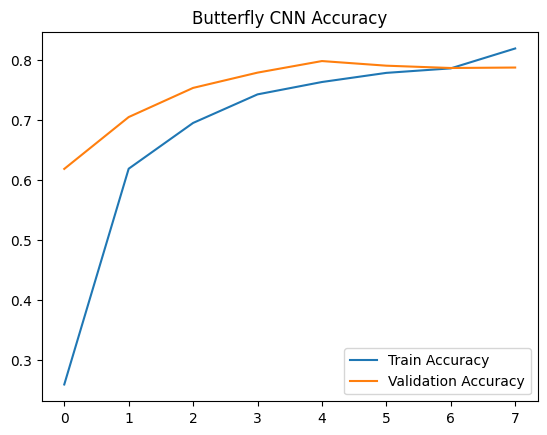

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Butterfly CNN Accuracy")
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"\nValidation Accuracy: {val_acc*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.7811 - loss: 0.7899

Validation Accuracy: 79.14%
